# Model and Cross Validation

I've pre-defined different features to test with my model to see which group of features performs best as well as perform hyperparameter tuning.

In [70]:
# Define the list of features to be used for each dataset
raw_original_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                         'PhoneService', 'MultipleLines_New', 'HasInternet', 'is_DSL', 
                         'is_Fiber_optic', 'OnlineSecurity_New', 'OnlineBackup_New', 
                         'DeviceProtection_New', 'TechSupport_New', 'StreamingTV_New', 'StreamingMovies_New',
                         'Contract_New', 'PaperlessBilling' ,'MonthlyCharges' ,'TotalCharges']

cleaned_original_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                         'PhoneService', 'MultipleLines_New', 'HasInternet', 'is_DSL', 
                         'is_Fiber_optic', 'OnlineSecurity_New', 'OnlineBackup_New', 
                         'DeviceProtection_New', 'TechSupport_New', 'StreamingTV_New', 'StreamingMovies_New',
                         'Contract_New', 'PaperlessBilling']

all_features = ['gender', 'SeniorCitizen', 'Partner' ,'Dependents' ,'tenure' ,'PhoneService' ,'PaperlessBilling' ,
                'MonthlyCharges' ,'TotalCharges','HasInternet','is_DSL' ,'is_Fiber_optic' ,'MultipleLines_New' ,
                'Contract_New', 'OnlineSecurity_New', 'OnlineBackup_New' ,'DeviceProtection_New', 'TechSupport_New' ,
                'StreamingTV_New' ,'StreamingMovies_New' ,'num_services' ,'LTV_Estimate' ,'AVG_Charge_Per_Service' ,'Family_Flag']

reduced_features = ['SeniorCitizen', 'Partner', 'Dependents', 'MonthlyCharges','tenure', 'is_DSL', 'is_Fiber_optic',
                    'MultipleLines_New' ,'Contract_New', 'OnlineSecurity_New', 'OnlineBackup_New' ,'DeviceProtection_New' ,
                    'TechSupport_New', 'StreamingTV_New', 'StreamingMovies_New', 'num_services']

In [3]:
import os
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## 1 Modeling: Raw Features

In [5]:
# Pull in raw original features first
train_features = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/train_features.csv')
train_labels = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/train_labels.csv')

train_features = train_features[raw_original_features]

train_features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_New,HasInternet,is_DSL,is_Fiber_optic,OnlineSecurity_New,OnlineBackup_New,DeviceProtection_New,TechSupport_New,StreamingTV_New,StreamingMovies_New,Contract_New,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,0,0,9,0,0,1,1,0,1,0,1,1,1,1,0,0,58.50,539.85
1,1,0,0,0,26,1,2,1,1,0,1,1,0,0,0,0,1,0,61.55,1581.95
2,0,0,0,0,3,1,1,1,1,0,0,0,1,0,1,1,1,1,69.95,220.45
3,1,0,0,0,7,1,2,1,0,1,0,0,0,0,0,0,0,0,73.60,520.00
4,1,0,1,1,67,1,1,1,1,0,1,0,1,1,0,0,2,1,60.40,3953.70


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

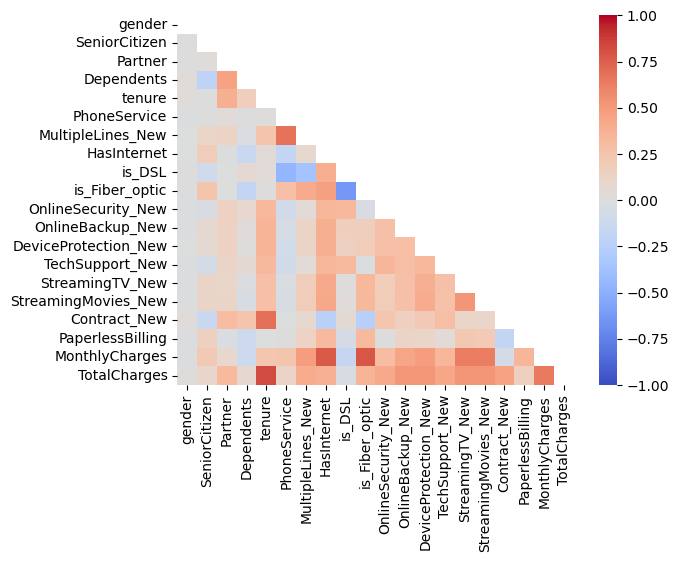

In [6]:
# Generate correlation Matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

### 1.1 GridSearchCV

In [8]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds =results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [9]:
# Conduct research for best parmeters while running cross-validation (GridSearchCV)
rf = XGBClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 32}

0.791 (+/-0.01) for {'max_depth': 2, 'n_estimators': 8}
0.799 (+/-0.022) for {'max_depth': 2, 'n_estimators': 16}
0.803 (+/-0.022) for {'max_depth': 2, 'n_estimators': 32}
0.801 (+/-0.023) for {'max_depth': 2, 'n_estimators': 64}
0.795 (+/-0.022) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.016) for {'max_depth': 2, 'n_estimators': 256}
0.789 (+/-0.02) for {'max_depth': 2, 'n_estimators': 512}
0.795 (+/-0.02) for {'max_depth': 4, 'n_estimators': 8}
0.8 (+/-0.023) for {'max_depth': 4, 'n_estimators': 16}
0.797 (+/-0.03) for {'max_depth': 4, 'n_estimators': 32}
0.788 (+/-0.027) for {'max_depth': 4, 'n_estimators': 64}
0.789 (+/-0.026) for {'max_depth': 4, 'n_estimators': 128}
0.78 (+/-0.016) for {'max_depth': 4, 'n_estimators': 256}
0.771 (+/-0.019) for {'max_depth': 4, 'n_estimators': 512}
0.792 (+/-0.02) for {'max_depth': 8, 'n_estimators': 8}
0.793 (+/-0.03) for {'max_depth': 8, 'n_estimators': 16}
0.788 (+/-0.019) for {'max_

### 1.2 Feature Importance

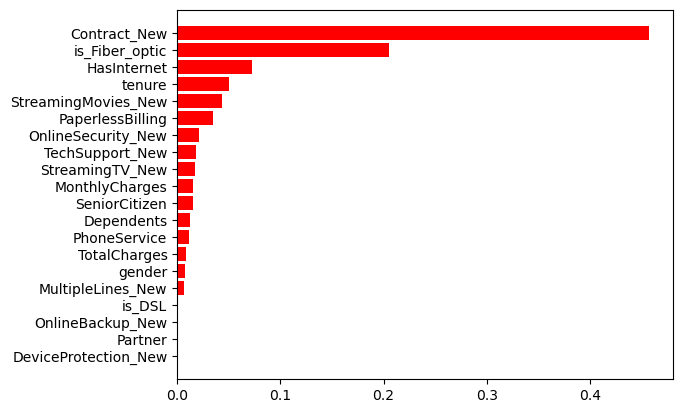

In [11]:
# Checking to see which features have the highest importance scores
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### 1.3 Write Out Pickled Model

In [13]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, os.path.expanduser('~/Documents/GitHub/telco-churn-analysis/data/mdl_raw_features.pkl'))

['/Users/danielkim/Documents/GitHub/telco-churn-analysis/data/mdl_raw_features.pkl']

## 2 Modeling: Cleaned Original Features

In [32]:
# Pull in raw original features first
train_features = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/train_features.csv')
train_labels = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/train_labels.csv')

train_features = train_features[cleaned_original_features]

train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines_New,HasInternet,is_DSL,is_Fiber_optic,OnlineSecurity_New,OnlineBackup_New,DeviceProtection_New,TechSupport_New,StreamingTV_New,StreamingMovies_New,Contract_New,PaperlessBilling
0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0
1,1,0,0,0,1,2,1,1,0,1,1,0,0,0,0,1,0
2,0,0,0,0,1,1,1,1,0,0,0,1,0,1,1,1,1
3,1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,0
4,1,0,1,1,1,1,1,1,0,1,0,1,1,0,0,2,1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

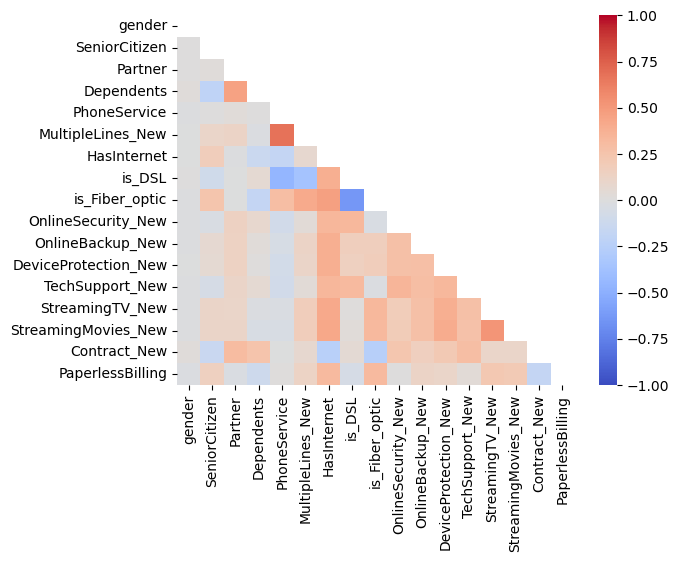

In [34]:
# Generate correlation Matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

### 2.1 GridSearchCV

In [37]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds =results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [39]:
# Conduct research for best parms while running cross-validation (GridSearchCV)
rf = XGBClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 8}

0.78 (+/-0.032) for {'max_depth': 2, 'n_estimators': 8}
0.782 (+/-0.031) for {'max_depth': 2, 'n_estimators': 16}
0.78 (+/-0.032) for {'max_depth': 2, 'n_estimators': 32}
0.781 (+/-0.025) for {'max_depth': 2, 'n_estimators': 64}
0.78 (+/-0.023) for {'max_depth': 2, 'n_estimators': 128}
0.781 (+/-0.026) for {'max_depth': 2, 'n_estimators': 256}
0.78 (+/-0.027) for {'max_depth': 2, 'n_estimators': 512}
0.784 (+/-0.037) for {'max_depth': 4, 'n_estimators': 8}
0.782 (+/-0.034) for {'max_depth': 4, 'n_estimators': 16}
0.781 (+/-0.027) for {'max_depth': 4, 'n_estimators': 32}
0.778 (+/-0.026) for {'max_depth': 4, 'n_estimators': 64}
0.772 (+/-0.027) for {'max_depth': 4, 'n_estimators': 128}
0.764 (+/-0.026) for {'max_depth': 4, 'n_estimators': 256}
0.756 (+/-0.05) for {'max_depth': 4, 'n_estimators': 512}
0.769 (+/-0.024) for {'max_depth': 8, 'n_estimators': 8}
0.762 (+/-0.023) for {'max_depth': 8, 'n_estimators': 16}
0.757 (+/-0.025) for {'m

### 2.2 Feature Importance

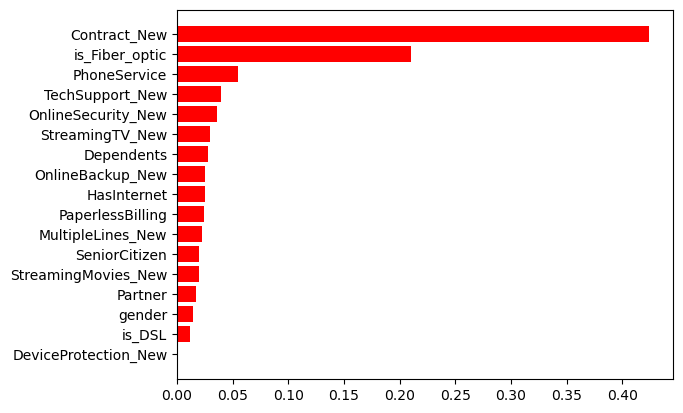

In [41]:
# Check how feature importance scores
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### 2.3 Write Out Pickled Model

In [43]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, os.path.expanduser('~/Documents/GitHub/telco-churn-analysis/data/mdl_cleaned_original_features.pkl'))

['/Users/danielkim/Documents/GitHub/telco-churn-analysis/data/mdl_cleaned_original_features.pkl']

## 3 Modeling: All Features

In [52]:
# Pull in raw original features first
train_features = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/train_features.csv')
train_labels = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/train_labels.csv')

train_features = train_features[all_features]

train_features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,HasInternet,...,OnlineSecurity_New,OnlineBackup_New,DeviceProtection_New,TechSupport_New,StreamingTV_New,StreamingMovies_New,num_services,LTV_Estimate,AVG_Charge_Per_Service,Family_Flag
0,0,0,0,0,9,0,0,58.50,539.85,1,...,1,0,1,1,1,1,6,526.50,9.75,0
1,1,0,0,0,26,1,0,61.55,1581.95,1,...,1,1,0,0,0,0,3,1600.30,20.51,0
2,0,0,0,0,3,1,1,69.95,220.45,1,...,0,0,1,0,1,1,4,209.85,17.48,0
3,1,0,0,0,7,1,0,73.60,520.00,1,...,0,0,0,0,0,0,1,515.20,73.53,0
4,1,0,1,1,67,1,1,60.40,3953.70,1,...,1,0,1,1,0,0,4,4046.80,15.10,1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

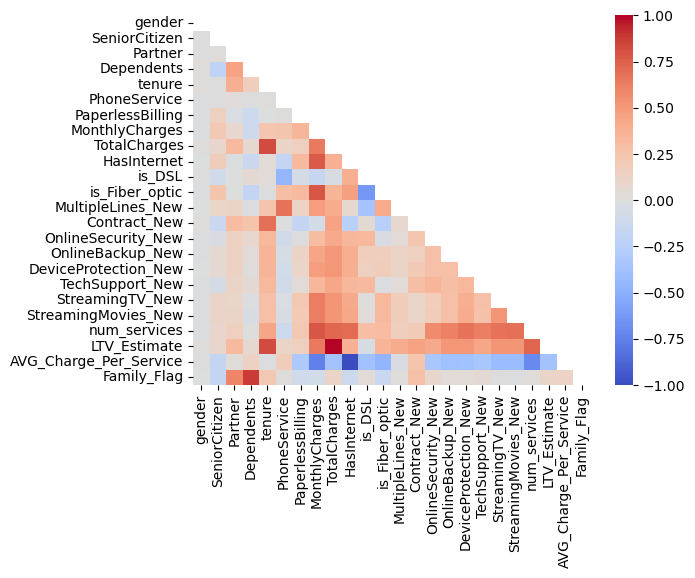

In [54]:
# Generate correlation Matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

### 3.1 GridSearchCV

In [57]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds =results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [59]:
# Conduct research for best aparms while running cross-validation (GridSearchCV)
rf = XGBClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 32}

0.79 (+/-0.011) for {'max_depth': 2, 'n_estimators': 8}
0.799 (+/-0.024) for {'max_depth': 2, 'n_estimators': 16}
0.801 (+/-0.02) for {'max_depth': 2, 'n_estimators': 32}
0.797 (+/-0.022) for {'max_depth': 2, 'n_estimators': 64}
0.799 (+/-0.025) for {'max_depth': 2, 'n_estimators': 128}
0.789 (+/-0.023) for {'max_depth': 2, 'n_estimators': 256}
0.781 (+/-0.024) for {'max_depth': 2, 'n_estimators': 512}
0.799 (+/-0.019) for {'max_depth': 4, 'n_estimators': 8}
0.799 (+/-0.025) for {'max_depth': 4, 'n_estimators': 16}
0.8 (+/-0.03) for {'max_depth': 4, 'n_estimators': 32}
0.791 (+/-0.024) for {'max_depth': 4, 'n_estimators': 64}
0.779 (+/-0.026) for {'max_depth': 4, 'n_estimators': 128}
0.774 (+/-0.025) for {'max_depth': 4, 'n_estimators': 256}
0.769 (+/-0.012) for {'max_depth': 4, 'n_estimators': 512}
0.79 (+/-0.021) for {'max_depth': 8, 'n_estimators': 8}
0.787 (+/-0.012) for {'max_depth': 8, 'n_estimators': 16}
0.785 (+/-0.011) for {'m

### 3.2 Feature Importance


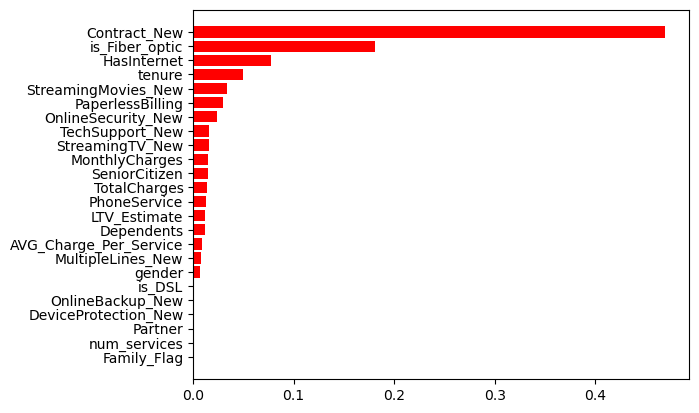

In [61]:
# See feature importance scores
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### 3.3 Write Out Pickled Model

In [63]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, os.path.expanduser('~/Documents/GitHub/telco-churn-analysis/data/mdl_all_features.pkl'))

['/Users/danielkim/Documents/GitHub/telco-churn-analysis/data/mdl_all_features.pkl']

## 4 Modeling: Reduced Features

In [72]:
# Pull in raw original features first
train_features = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/train_features.csv')
train_labels = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/train_labels.csv')

train_features = train_features[reduced_features]

train_features.head()

,SeniorCitizen,Partner,Dependents,MonthlyCharges,tenure,is_DSL,is_Fiber_optic,MultipleLines_New,Contract_New,OnlineSecurity_New,OnlineBackup_New,DeviceProtection_New,TechSupport_New,StreamingTV_New,StreamingMovies_New,num_services
0,0,0,0,58.50,9,1,0,0,0,1,0,1,1,1,1,6
1,0,0,0,61.55,26,1,0,2,1,1,1,0,0,0,0,3
2,0,0,0,69.95,3,1,0,1,1,0,0,1,0,1,1,4
3,0,0,0,73.60,7,0,1,2,0,0,0,0,0,0,0,1
4,0,1,1,60.40,67,1,0,1,2,1,0,1,1,0,0,4


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

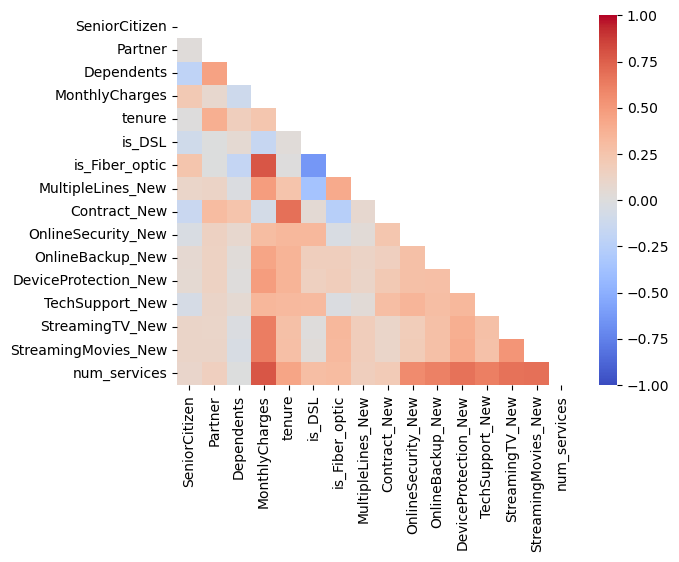

In [74]:
# Generate correlation Matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

### 4.1 GridSearchCV

In [76]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds =results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [79]:
# Conduct research for best aparms while running cross-validation (GridSearchCV)
rf = XGBClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 32}

0.791 (+/-0.01) for {'max_depth': 2, 'n_estimators': 8}
0.799 (+/-0.017) for {'max_depth': 2, 'n_estimators': 16}
0.802 (+/-0.025) for {'max_depth': 2, 'n_estimators': 32}
0.799 (+/-0.025) for {'max_depth': 2, 'n_estimators': 64}
0.797 (+/-0.026) for {'max_depth': 2, 'n_estimators': 128}
0.796 (+/-0.022) for {'max_depth': 2, 'n_estimators': 256}
0.789 (+/-0.021) for {'max_depth': 2, 'n_estimators': 512}
0.796 (+/-0.015) for {'max_depth': 4, 'n_estimators': 8}
0.796 (+/-0.022) for {'max_depth': 4, 'n_estimators': 16}
0.795 (+/-0.025) for {'max_depth': 4, 'n_estimators': 32}
0.791 (+/-0.024) for {'max_depth': 4, 'n_estimators': 64}
0.782 (+/-0.019) for {'max_depth': 4, 'n_estimators': 128}
0.776 (+/-0.029) for {'max_depth': 4, 'n_estimators': 256}
0.771 (+/-0.033) for {'max_depth': 4, 'n_estimators': 512}
0.784 (+/-0.022) for {'max_depth': 8, 'n_estimators': 8}
0.79 (+/-0.02) for {'max_depth': 8, 'n_estimators': 16}
0.783 (+/-0.018) for 

### 4.2 Feature Importance

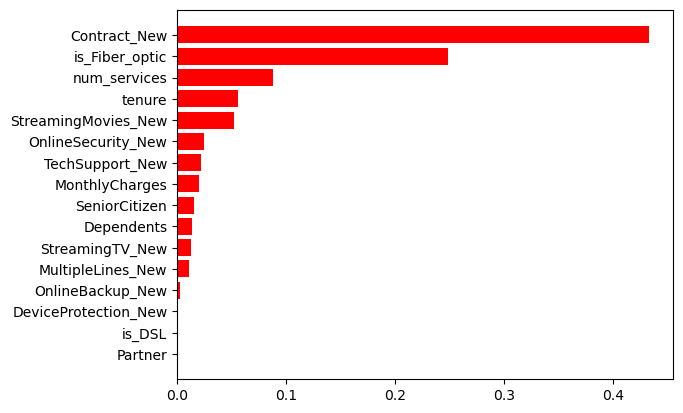

In [81]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### 4.3 Write Out Pickled Model

In [83]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, os.path.expanduser('~/Documents/GitHub/telco-churn-analysis/data/mdl_reduced_features.pkl'))

['/Users/danielkim/Documents/GitHub/telco-churn-analysis/data/mdl_reduced_features.pkl']

## 5 Compare and Evaluate all Models

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/val_features.csv')
val_features_raw = val_features[raw_original_features]
val_features_original = val_features[cleaned_original_features]
val_features_all = val_features[all_features]
val_features_reduced = val_features[reduced_features]

val_labels = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/val_labels.csv')

val_features_raw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_New,HasInternet,is_DSL,is_Fiber_optic,OnlineSecurity_New,OnlineBackup_New,DeviceProtection_New,TechSupport_New,StreamingTV_New,StreamingMovies_New,Contract_New,PaperlessBilling,MonthlyCharges,TotalCharges
0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,18.80,18.80
1,0,0,0,0,25,1,2,0,0,0,0,0,0,0,0,0,2,0,24.75,692.10
2,1,0,1,1,23,1,2,1,1,0,0,1,0,1,0,0,2,0,59.70,1414.20
3,1,1,1,0,38,0,0,1,1,0,0,0,0,0,0,0,0,1,24.85,955.75
4,1,0,1,1,35,1,2,0,0,0,0,0,0,0,0,0,2,0,25.45,809.25


### 5.1 Evaluate Models On The Validation Set

In [87]:
models = {}

for mdl in ['raw', 'cleaned_original', 'all', 'reduced']:
    models[mdl] = joblib.load(os.path.expanduser('~/Documents/GitHub/telco-churn-analysis/data/mdl_{}_features.pkl'.format(mdl)))

In [88]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name, accuracy, precision, recall, round((end - start)*1000, 1)))

In [89]:
# Evaluate all of our models on the validation set
evaluate_model('Raw Features', models['raw'], val_features_raw, val_labels)
evaluate_model('Cleaned Features', models['cleaned_original'], val_features_original, val_labels)
evaluate_model('All Features', models['all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['reduced'], val_features_reduced, val_labels)

Raw Features -- 	Accuracy: 0.807 / Precision: 0.686 / Recall: 0.533 / Latency: 2.9ms
Cleaned Features -- 	Accuracy: 0.778 / Precision: 0.615 / Recall: 0.495 / Latency: 1.7ms
All Features -- 	Accuracy: 0.806 / Precision: 0.681 / Recall: 0.537 / Latency: 1.0ms
Reduced Features -- 	Accuracy: 0.809 / Precision: 0.698 / Recall: 0.523 / Latency: 1.0ms


### 5.2 Evaluate Best Model On Test Set

In [104]:
# Read in our test features
test_features = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/test_features.csv')
test_features = test_features[reduced_features]

test_labels = pd.read_csv('~/Documents/GitHub/telco-churn-analysis/data/test_labels.csv')

In [106]:
# Evaluate our final model on the test set
evaluate_model('Reduced Features', models['reduced'], test_features, test_labels)

Reduced Features -- 	Accuracy: 0.793 / Precision: 0.625 / Recall: 0.511 / Latency: 6.2ms


I tested all the pre-determined features and found that the reduced features grouping performed the best.
However, the performance was not a big difference between all of the different models.

Some next steps that I would do if I had more time:
- test more models
- check if I'm getting false positive or false negatives
- Deeper hyperparameter tuning on more parameters like learning rate
- Use a different method of feature selection. Try model based or wrapper based feature selection to see if there is improvement.